In [153]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import os

In [155]:
notebook_dir = os.getcwd()# Get the directory where the notebook is located
#uncomment the dataset you want to analyze
#Dataset 1
dataset_path = os.path.join(notebook_dir, "credit_card_transactions.csv")#if using samples change this to sample_credit_card_transactions.csv
# Load the dataset
df = pd.read_csv(dataset_path)
df = df.dropna()
dfY = df['is_fraud']
dfX = df.drop(['Unnamed: 0', 'is_fraud'], axis=1)

#Dataset 2
#dataset_path = os.path.join(notebook_dir, "card_transdata.csv") #if using samples change this to sample_Card_transdata.csv
#df = pd.read_csv(dataset_path)
#df = df.dropna()
#dfY =df['fraud']
#dfX =df.drop('fraud', axis=1)

#Dataset 3
#dataset_path = os.path.join(notebook_dir, "train_transaction.csv") #if using samples change this to sample_ieee_fraud.csv
#df = pd.read_csv(dataset_path)
#dfY = df["isFraud"]
#df= df.iloc[:, list(range(2, 13)) +[15]]
#dfX = df.dropna().copy() 
#dfY = dfY.loc[dfX.index]

#Dataset 4
# = os.path.join(notebook_dir, "creditcard.csv") #if using samples change this to sample_creditcard.csv
#df = pd.read_csv(dataset_path)
#df = df.dropna()
#dfY = df['Class']
#dfX = df.drop('Class', axis=1)

In [156]:
#identify the columns that are not floats
string_columns = dfX.select_dtypes(exclude=["float64"]).columns

# Changes strings to floats
label_encoders = {}
for col in string_columns:
    le = LabelEncoder()
    dfX[col] = le.fit_transform(dfX[col].astype(str))

In [169]:
X_train, X_test, y_train, y_test = train_test_split(
    dfX, dfY, test_size=0.2, random_state=0, stratify=dfY)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


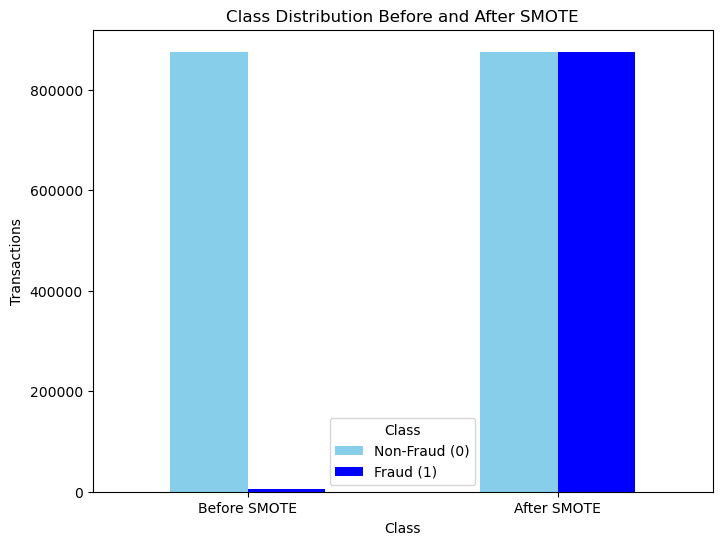

In [161]:
smote = SMOTE(random_state=42, sampling_strategy='auto')
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

before_smote = pd.Series(y_train).value_counts()
after_smote = pd.Series(y_train_resampled).value_counts()
smote_data = pd.DataFrame({
    'Before SMOTE': before_smote,
    'After SMOTE': after_smote
}).T  #Transpose to make the class labels columns
smote_data.columns = ['Non-Fraud (0)', 'Fraud (1)']

# Plotting
smote_data.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'blue'])
plt.title("Class Distribution Before and After SMOTE")
plt.xlabel("Class")
plt.ylabel("Transactions")
plt.xticks(rotation=0)  # Keep the labels horizontal
plt.legend(title="Class")
plt.show()

In [163]:
RF = RandomForestClassifier( random_state= 0, class_weight='balanced')
RF.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=0)

In [165]:
pred = RF.predict(X_test)
print ('Accuracy Score: ', accuracy_score(y_test, pred))
print('Precision Score: ', precision_score(y_test, pred))
print('Recall Score: ', recall_score(y_test, pred))
print('F1-score: ', f1_score(y_test, pred))
print('\nConfusion Matrix\n', confusion_matrix(y_test, pred))

Accuracy Score:  0.9973108144325682
Precision Score:  0.901060070671378
Recall Score:  0.600942655145326
F1-score:  0.7210179076343073

Confusion Matrix
 [[218784     84]
 [   508    765]]



10 Most Important Features:
                  feature  importance
4                     amt    0.611916
3                category    0.095004
18              unix_time    0.026985
0   trans_date_trans_time    0.026884
16                    dob    0.023107
19              merch_lat    0.015830
2                merchant    0.015732
20             merch_long    0.015290
1                  cc_num    0.014823
21          merch_zipcode    0.014771


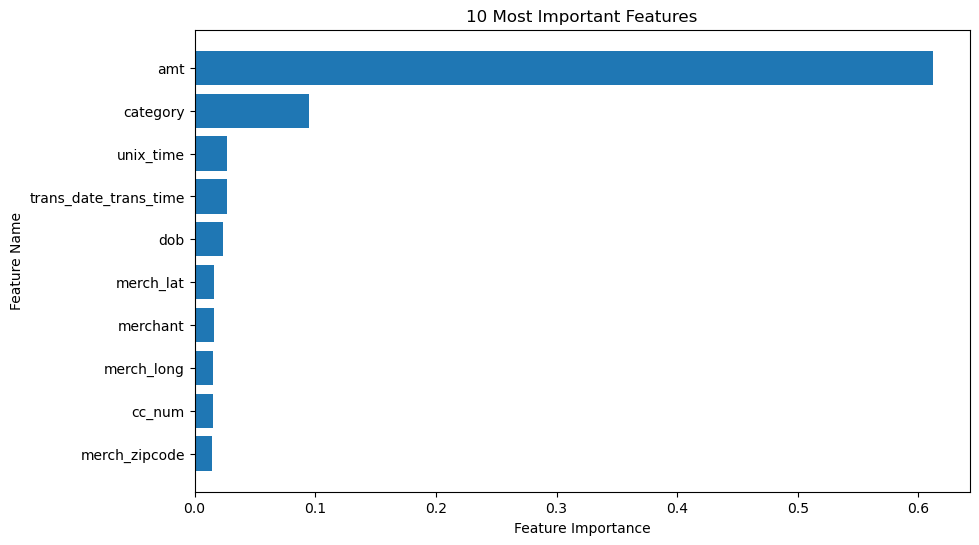

In [167]:
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': RF.feature_importances_
})
#Sort by importance
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\n10 Most Important Features:")
top_features = feature_importance.head(10)
print(top_features)

#Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('10 Most Important Features')
plt.gca().invert_yaxis()  #most important feature on top
plt.show()